# INTRODUÇÃO

A **churn** ou desgaste de clientes é uma tendência dos clientes ou consumidores de abandonarem uma marca e deixarem de ser clientes pagantes de uma determinada empresa ou organização. A porcentagem de clientes que descontinuam o uso dos serviços ou produtos de uma empresa durante um período específico é chamada de **customer churn rate** (taxa de rotatividade de clientes). Várias experiências ruins (ou apenas uma) são suficientes e um cliente pode desistir. E se uma grande quantidade de clientes insatisfeitos mudasse em um intervalo de tempo, tanto as perdas materiais quanto os danos à reputação seriam enormes.

Um banco de renome “ABC BANK” deseja prever a taxa de rotatividade. Desa forma, nosso objetivo é buscar identificar qual o perfil de cliente que dá churn no banco.

Este conjunto de dados é composto pelas seguintes colunas:
- customer_id
- credit_score
- country
- gender
- age
- tenure
- balance
- products_number
- credit_card
- active_member
- estimated_salary
- churn (1 Se o cliente deixou o banco durante algum período ou 0 se ele/ela não o fez.)

**Link para o conjunto de dados: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data**

# 1. Importando Bibliotecas

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Configurações
plt.style.use('ggplot') 
pd.set_option('display.max_rows',20) 
pd.set_option('display.max_columns',40)

import warnings

# Desativar a exibição do aviso
warnings.filterwarnings("ignore", category=UserWarning)


# 2. Carregando o DataSet

In [79]:
df=pd.read_csv('C:/Users/casa/Downloads/Cursos/Clube de Dados/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.nunique().sort_values()

gender                  2
credit_card             2
active_member           2
churn                   2
country                 3
products_number         4
tenure                 11
age                    70
credit_score          460
balance              6382
estimated_salary     9999
customer_id         10000
dtype: int64

In [15]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
idade_minima= df['age'].min()
idade_max= df['age'].max()
print(F"Nosso DataSet contém clientes cuja idade vai de {idade_minima} até {idade_max} anos.")

Nosso DataSet contém clientes cuja idade vai de 18 até 92 anos.


In [20]:
saldo_minima= df['balance'].min()
saldo_max= df['balance'].max()

print(F"Nosso DataSet contém clientes cujo saldo vai de {saldo_minima} até {saldo_max} reais.")

Nosso DataSet contém clientes cujo saldo vai de 0.0 até 250898.09 reais.


Alguns Clientes não possuem saldo na conta, deveriamos investigar mais..

In [25]:
dados_saldo_zero = df[df['balance'] == 0]
dados_saldo_zero

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15605622,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,15657105,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,15719294,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.0,2,1,0,96270.64,0


Vamos verificar quais os clientes com maior salário e maior saldo.

In [31]:
maiores_balances = df['balance'].nlargest(3).to_list()
maiores_salarios = df['estimated_salary'].nlargest(3).to_list()

# Realizando a consulta
resultado_query = df.query(f'balance in {maiores_balances} or estimated_salary in {maiores_salarios}')
resultado_query

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2092,15757408,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,15715622,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
3580,15634359,639,Germany,Female,41,5,98635.77,1,1,0,199970.74,0
4417,15697270,608,Spain,Male,27,4,153325.10,1,1,1,199953.33,0
6646,15662021,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
8733,15714241,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1


# 3. Análise de Dados Categórica

In [36]:
contagem_normalizada = df['gender'].value_counts(normalize=True)

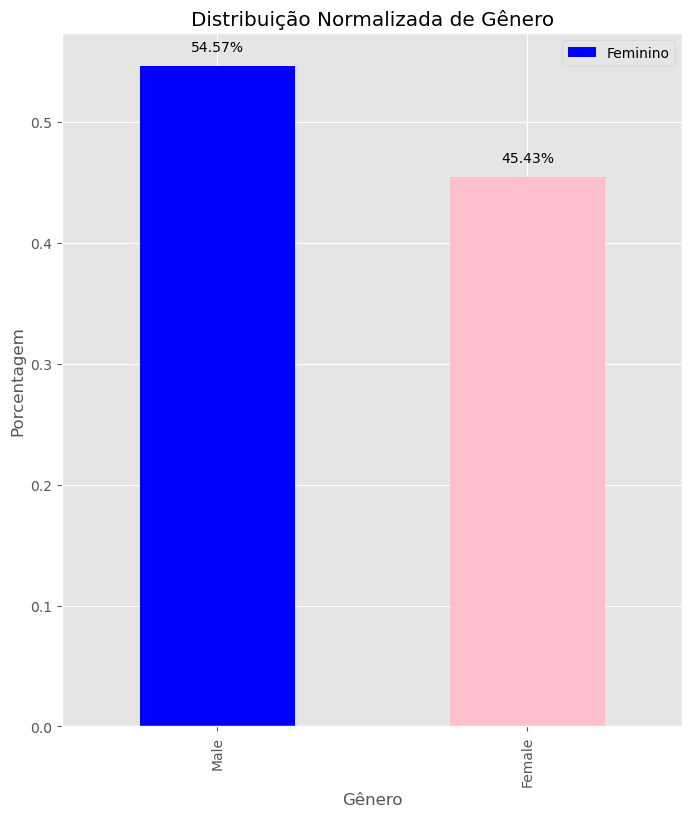

In [42]:
# Ajustando o tamanho da figura para aumentar o espaço físico
fig, ax = plt.subplots(figsize=(8, 9))

# Criando o gráfico de barras
ax = contagem_normalizada.plot(kind='bar', color=['blue', 'pink'])

# Adicionando rótulos aos valores nas barras
for i, v in enumerate(contagem_normalizada):
    ax.text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom')

# Adicionando rótulos e título ao gráfico
plt.title('Distribuição Normalizada de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Porcentagem')

# Adicionando legenda
plt.legend(['Feminino', 'Masculino'])

# Exibindo o gráfico
plt.show()

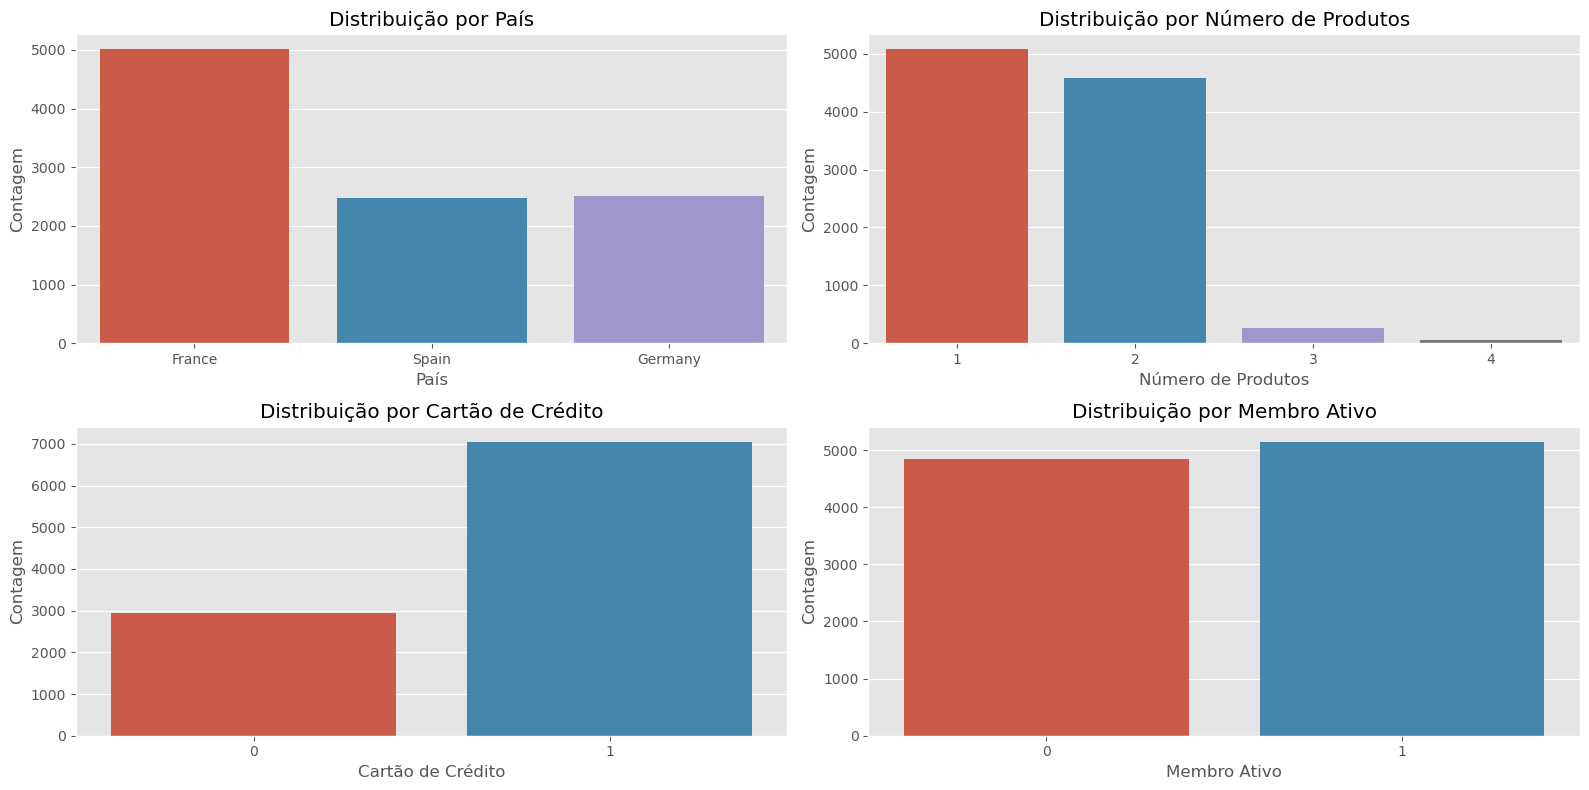

In [52]:

# Criando a figura e os eixos
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Criando os gráficos de contagem usando seaborn
sns.countplot(data=df, x='country', ax=axes[0][0])
axes[0][0].set_title('Distribuição por País')
axes[0][0].set_xlabel('País')
axes[0][0].set_ylabel('Contagem')

sns.countplot(data=df, x='products_number', ax=axes[0][1])
axes[0][1].set_title('Distribuição por Número de Produtos')
axes[0][1].set_xlabel('Número de Produtos')
axes[0][1].set_ylabel('Contagem')

sns.countplot(data=df, x='credit_card', ax=axes[1][0])
axes[1][0].set_title('Distribuição por Cartão de Crédito')
axes[1][0].set_xlabel('Cartão de Crédito')
axes[1][0].set_ylabel('Contagem')

sns.countplot(data=df, x='active_member', ax=axes[1][1])
axes[1][1].set_title('Distribuição por Membro Ativo')
axes[1][1].set_xlabel('Membro Ativo')
axes[1][1].set_ylabel('Contagem')



# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()


Vamos verificar como está a variável balance

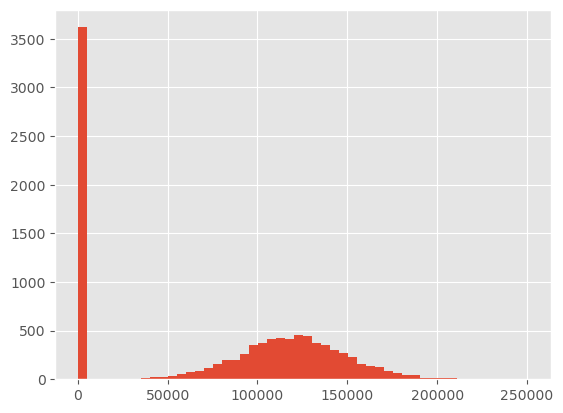

In [53]:
_= plt.hist(df.balance, bins=50)

Qual o percentual de clientes com zero de saldo?

In [58]:
clientes_zerados= len(df[df['balance'] == 0])
total= len(df)
print(f" Temos {clientes_zerados/total} de nossos clientes sem saldo.")

 Temos 0.3617 de nossos clientes sem saldo.


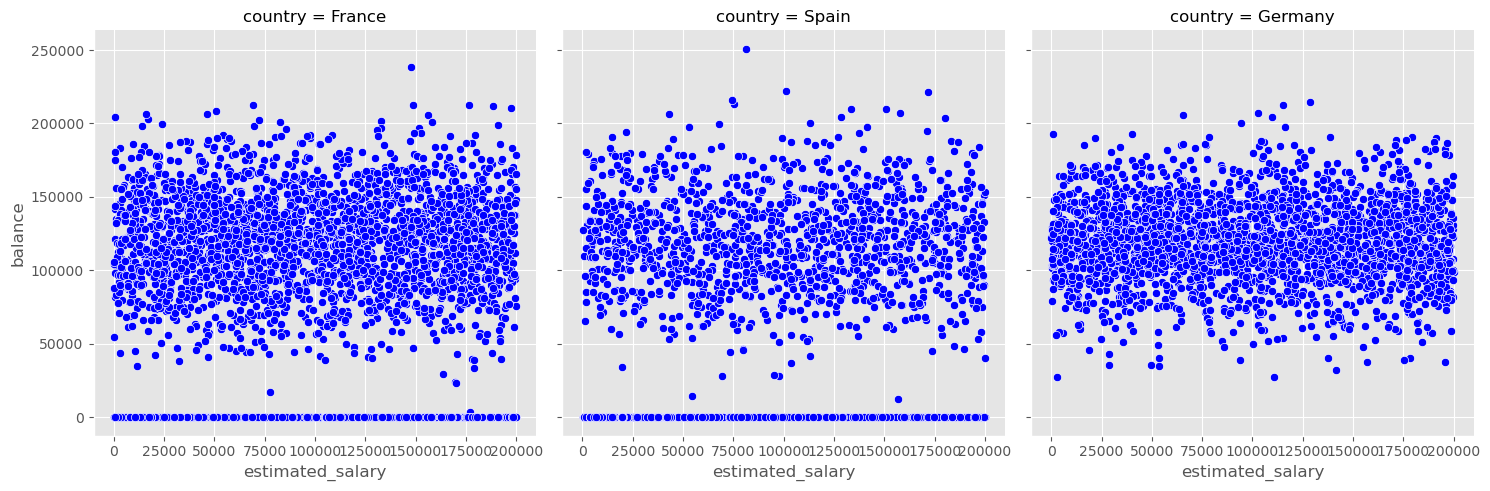

In [82]:
_= sns.relplot ( x= 'estimated_salary', y='balance', data=df, col= "country", color='b')

Curiosamente, não existe uma relação clara entre salário e saldo bancário.

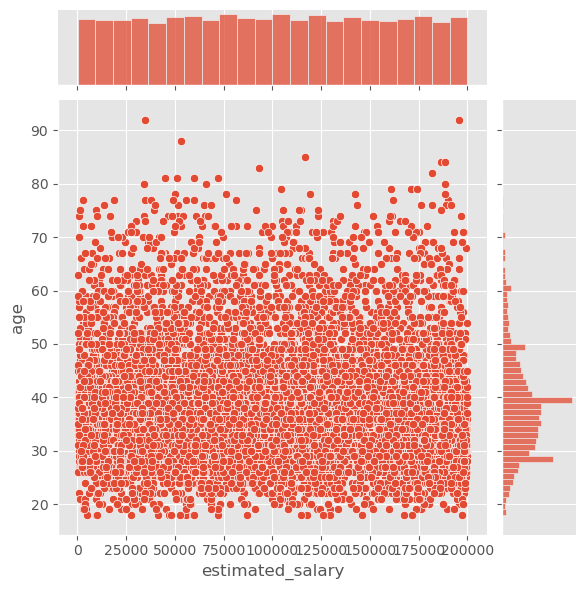

In [62]:
_ = sns.jointplot(x='estimated_salary', y='age', data=df)

# 4. Análise de Churn

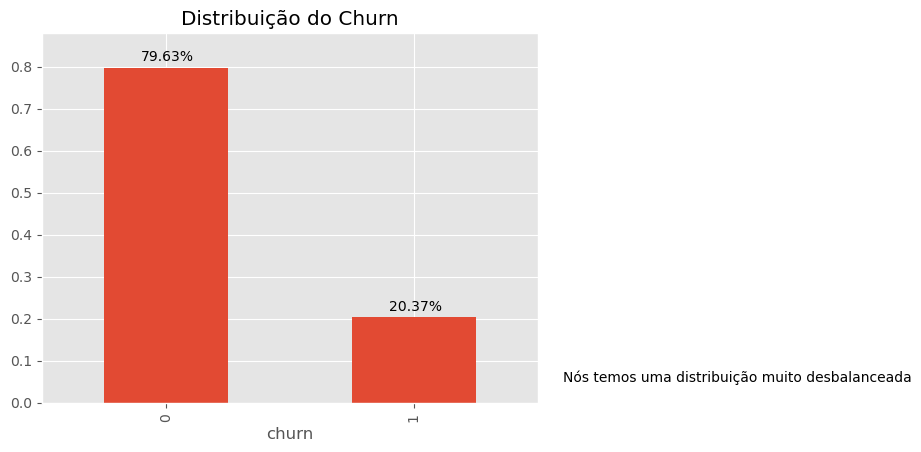

In [65]:
# Criando o gráfico de barras da distribuição do churn
_ = df['churn'].value_counts(1).plot.bar()
_ = plt.title("Distribuição do Churn")

# Adicionando os valores nas barras
_ = plt.text(-0.1, 0.815, f"{df['churn'].value_counts(1)[0]:.2%}")
_ = plt.text(0.9, 0.22, f"{df['churn'].value_counts(1)[1]:.2%}")

# Ajustando o limite do eixo y
_ = plt.ylim(0, 0.88)

# Adicionando uma anotação
_ = plt.text(1.6, 0.05, 'Nós temos uma distribuição muito desbalanceada')

# Exibindo o gráfico
plt.show()

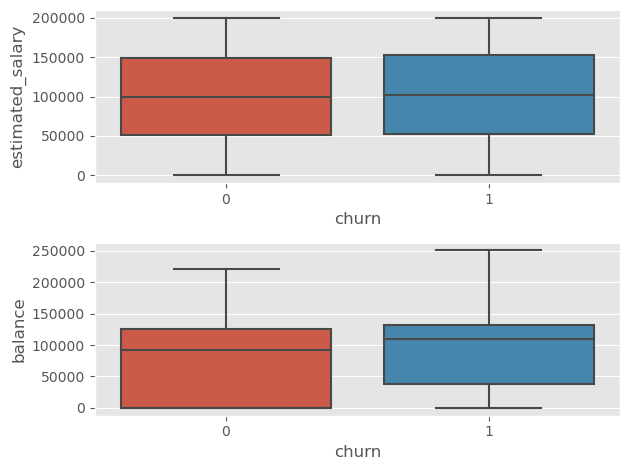

In [67]:
fig, axes = plt.subplots(2, 1)

_ = sns.boxplot(data=df, x = 'churn', y='estimated_salary', ax=axes[0])
_ = sns.boxplot(data=df, x = 'churn', y='balance', ax=axes[1])

_ = fig.tight_layout()

Aparentemente, o salário não é um bom preditor de churn. Por outro lado, parece que o saldo tem alguma relação com o churn. As pessoas que dão churn possuem saldo menor do que quem não dá churn.


In [69]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [83]:
media_por_balance = df.groupby('churn')['balance'].median()
media_por_balance


churn
0     92072.68
1    109349.29
Name: balance, dtype: float64

In [86]:
df.groupby('churn').agg({'balance': ['mean', 'median']})


balance           
               mean     median
churn                         
0      72745.296779   92072.68
1      91108.539337  109349.29

In [90]:
from scipy.stats import skew

agg_func = {
    'estimated_salary':['min', 'median', 'mean', 'std', skew],
    'balance':['min', 'median', 'mean', 'std', skew],
    'age':['min', 'median', 'mean', 'std', skew]
}

df.groupby('churn').agg(agg_func)

estimated_salary                                                    \
                   min     median           mean           std      skew   
churn                                                                      
0                90.07   99645.04   99738.391772  57405.586966  0.010994   
1                11.58  102460.84  101465.677531  57912.418071 -0.033080   

      balance                                                  age         \
          min     median          mean           std      skew min median   
churn                                                                       
0         0.0   92072.68  72745.296779  62848.040701 -0.046879  18   36.0   
1         0.0  109349.29  91108.539337  58360.794816 -0.512354  18   45.0   

                                       
            mean        std      skew  
churn                                  
0      37.408389  10.125363  1.377439  
1      44.837997   9.761562  0.077920

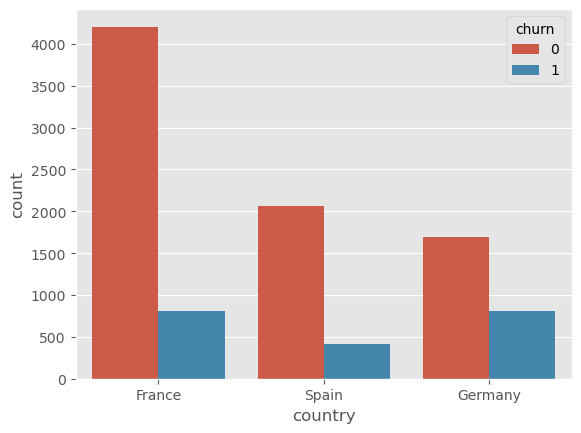

In [92]:
_ = sns.countplot(data=df, x='country', hue='churn')

In [94]:
# Percentual de Churn em cada país.
df.groupby('country')['churn'].mean().sort_values()


country
France     0.161548
Spain      0.166734
Germany    0.324432
Name: churn, dtype: float64

In [95]:
# Percentual de Churn em quem possui cartão de crédito
df.groupby('credit_card')['churn'].mean().sort_values()


credit_card
1    0.201843
0    0.208149
Name: churn, dtype: float64

# 5. Análise Credit Card

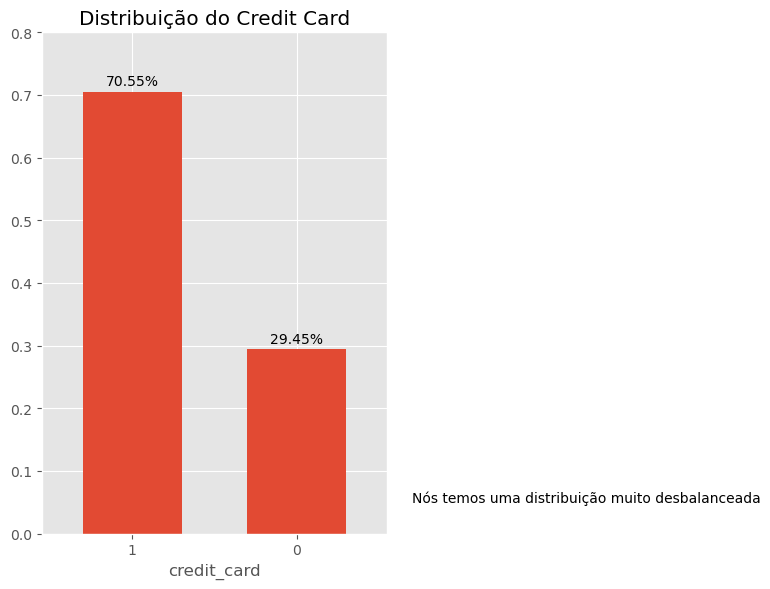

In [111]:

# Criando o gráfico de barras da distribuição do Credit Card
fig, ax = plt.subplots(figsize=(8, 6))  # Ajuste o tamanho da figura conforme necessário
df['credit_card'].value_counts(normalize=True).plot(kind='bar', ax=ax, width=0.6, align='center')

# Adicionando os valores nas barras
for i, value in enumerate(df['credit_card'].value_counts(normalize=True)):
    ax.text(i, value + 0.01, f"{value:.2%}", ha='center')

# Adicionando uma anotação
ax.text(1.7, 0.05, 'Nós temos uma distribuição muito desbalanceada')

# Configurando o título do gráfico
ax.set_title("Distribuição do Credit Card")

# Ajustando o espaçamento entre os ticks do eixo x
ax.set_xticks(range(len(df['credit_card'].unique())))
ax.set_xticklabels(df['credit_card'].unique(), rotation=0)

# Ajustando o limite superior do eixo y para 1.0
ax.set_ylim(0, 0.8)


# Exibindo o gráfico
plt.tight_layout()  # Garante um layout mais espaçado
plt.show()

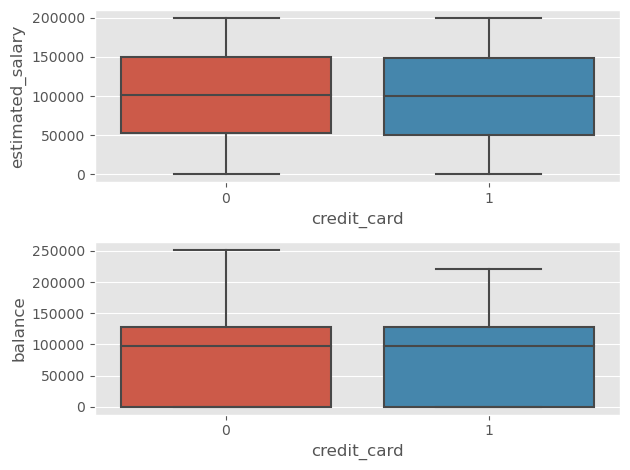

In [113]:
fig, axes = plt.subplots(2, 1)

_ = sns.boxplot(data=df, x = 'credit_card', y='estimated_salary', ax=axes[0])
_ = sns.boxplot(data=df, x = 'credit_card', y='balance', ax=axes[1])

_ = fig.tight_layout()

Aparentemente, o salário e o saldo não é um bom preditor de quem apresenta cartão de crédito ou não.

In [115]:

agg_func = {
    'estimated_salary':['min', 'median', 'mean', 'std', skew],
    'balance':['min', 'median', 'mean', 'std', skew],
    'age':['min', 'median', 'mean', 'std', skew]
}

df.groupby('credit_card').agg(agg_func)

estimated_salary                                          \
                         min     median           mean           std   
credit_card                                                            
0                      90.07  101617.43  100974.397711  57761.338594   
1                      11.58   99398.36   99721.161949  57405.532277   

                      balance                                                  \
                 skew     min    median          mean           std      skew   
credit_card                                                                     
0           -0.037262     0.0  97990.49  77920.787552  61951.756426 -0.170316   
1            0.018575     0.0  96877.21  75886.913330  62577.134010 -0.128739   

            age                                         
            min median       mean        std      skew  
credit_card                                             
0            18   38.0  39.112054  10.528381  0.962887  
1            18   37.0  38.842381  10.470548  1.031687

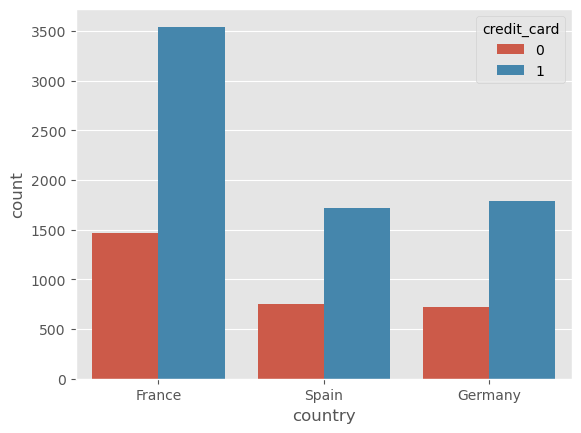

In [116]:
_ = sns.countplot(data=df, x='country', hue='credit_card')

# 6. Conclusão

A análise acima buscou entender quais as variáveis que estão relacionadas ao churn.

Vimos que clientes com saldo maior estão mais propensos ao churn.